In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import time 
import os    
import copy
import math

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_image_file = '../../Data/Image_Data_Original/sign_mnist_train.csv'

test_image_file = '../../Data/Image_Data_Original/sign_mnist_test.csv'

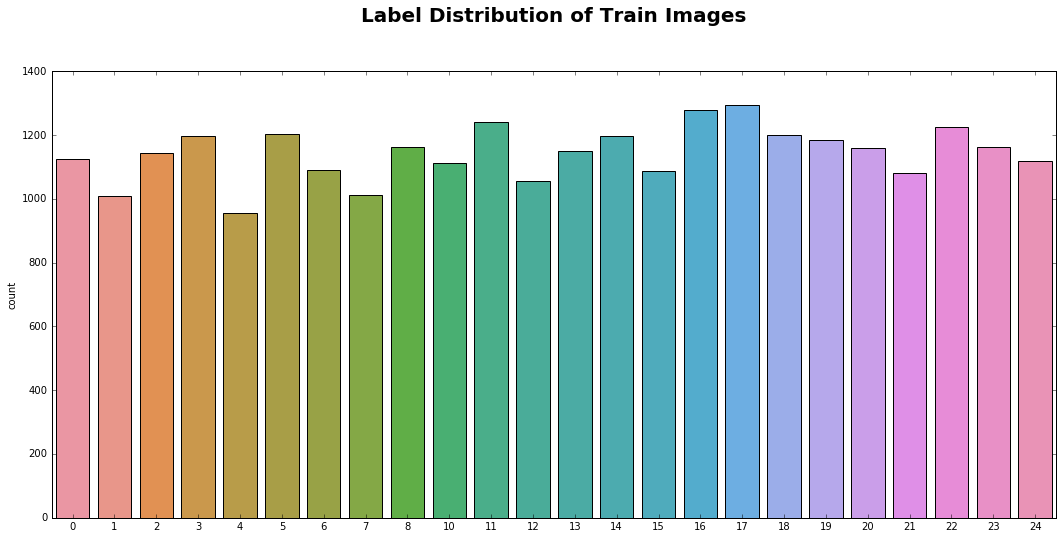

In [7]:
train = pd.read_csv(train_image_file)

train_labels = train['label'].values

plt.figure(figsize = (18,8))
plt.title('Label Distribution of Train Images', fontsize=20.0, y=1.1, color='black', fontweight='bold')
sns.countplot(x = train_labels)
plt.show()
    
train.drop('label', axis = 1, inplace = True)

train_images = train.values
train_images = train_images.reshape(train_images.shape[0], 28, 28)

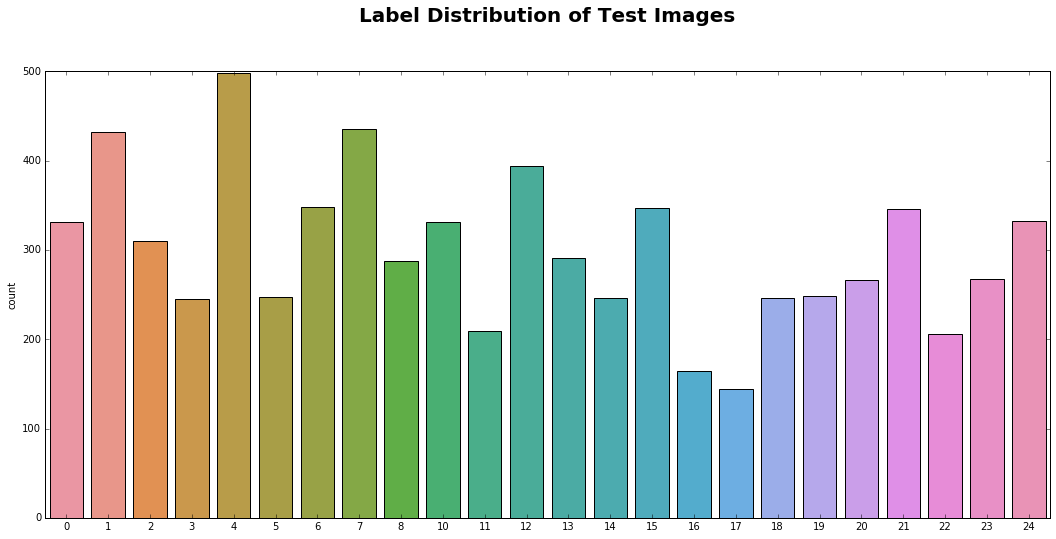

In [8]:
test = pd.read_csv(test_image_file)

test_labels = test['label'].values

plt.figure(figsize = (18,8))
plt.title('Label Distribution of Test Images', fontsize=20.0, y=1.1, color='black', fontweight='bold')
sns.countplot(x = test_labels)
plt.show()
    
test.drop('label', axis = 1, inplace = True)
    
test_images = test.values
test_images = test_images.reshape(test_images.shape[0], 28, 28)

# Generate collection of images for visualization

In [ ]:
training_collection = [[] for x in range(26)]

for i in range(len(train_images)):
    img = train_images[i]
    lbl = train_labels[i]
    
    training_collection[lbl].append(img)

    
testing_collection = [[] for x in range(26)]

for i in range(len(test_images)):
    img = test_images[i]
    lbl = test_labels[i]
    
    testing_collection[lbl].append(img)

# Image Plotting

In [ ]:
import string
alphas = list(string.ascii_lowercase)  ### list of alphabets

def draw_imgs(alphabet, typ):  

    l = alphas.index(alphabet)

    fig = plt.figure(figsize = (60,60))
    
    collection = []
    if typ == 'train':
        plt.suptitle('Training Images for ' + alphabet, fontsize=50.0 , color='black', fontweight='bold')
        collection = training_collection
    elif typ == 'test':
        plt.suptitle('Test Images for ' + alphabet, fontsize=50.0 , color='black', fontweight='bold')
        collection = testing_collection
    else:
        print('\nInvalid Type of Dataset!!!\n')
        return
        
        
    ims = []
    maxshow = min(len(collection), 100)
    
    ln = len(collection[l][:maxshow])
    plot_size = int(math.sqrt(ln))+1

    for i in range(ln):
        plt.subplot(plot_size, plot_size, i+1)
        im = plt.imshow(collection[l][i], cmap='gray')
        plt.xticks([])
        plt.yticks([])

        
    return fig
 

# Interactive Visualization

Enter the alphabet for which you want to visualize the hand gestures. To exit visualization, enter 'y' when exit propmpt occurs.
The input can be given as lowercase or uppercase alphabets.

Only first 100 images are shown, unless the images collected for any alphabet are fewer than 100.

Note: Labels 'j' and 'z' are not in the dataset. Hence, visualization will not work for these alphabets. 

Enter the desired alphabet: H


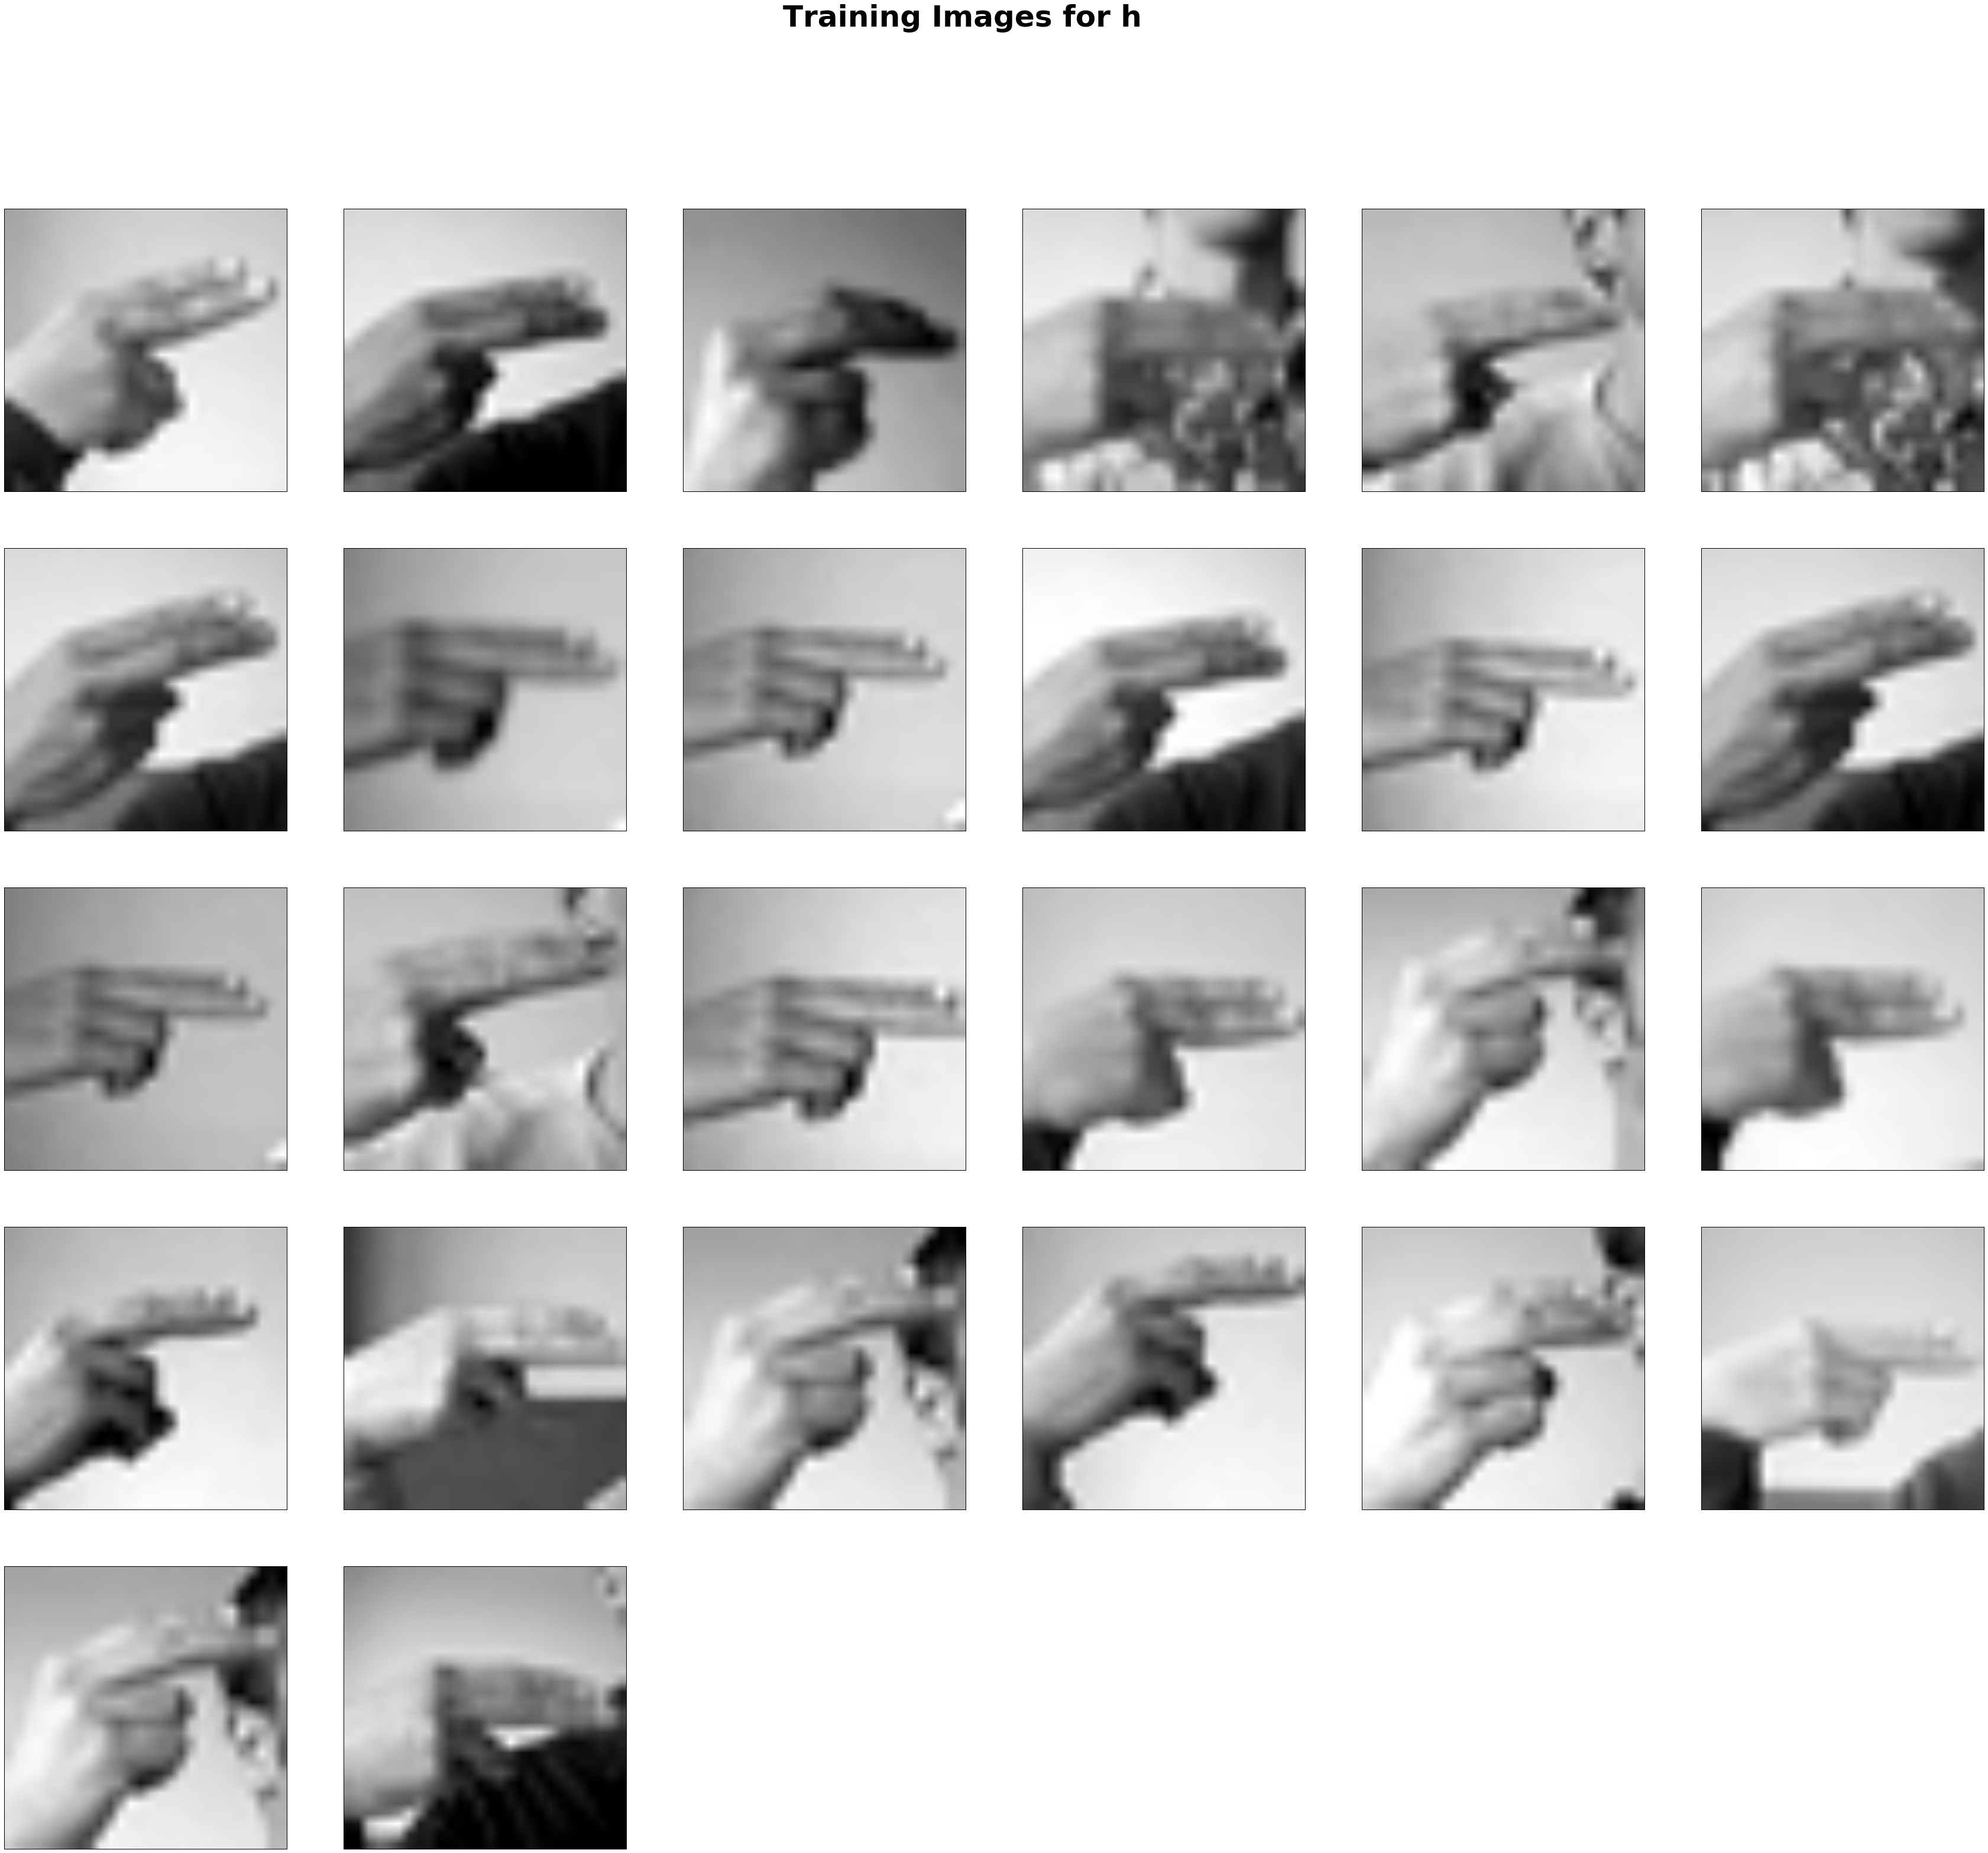

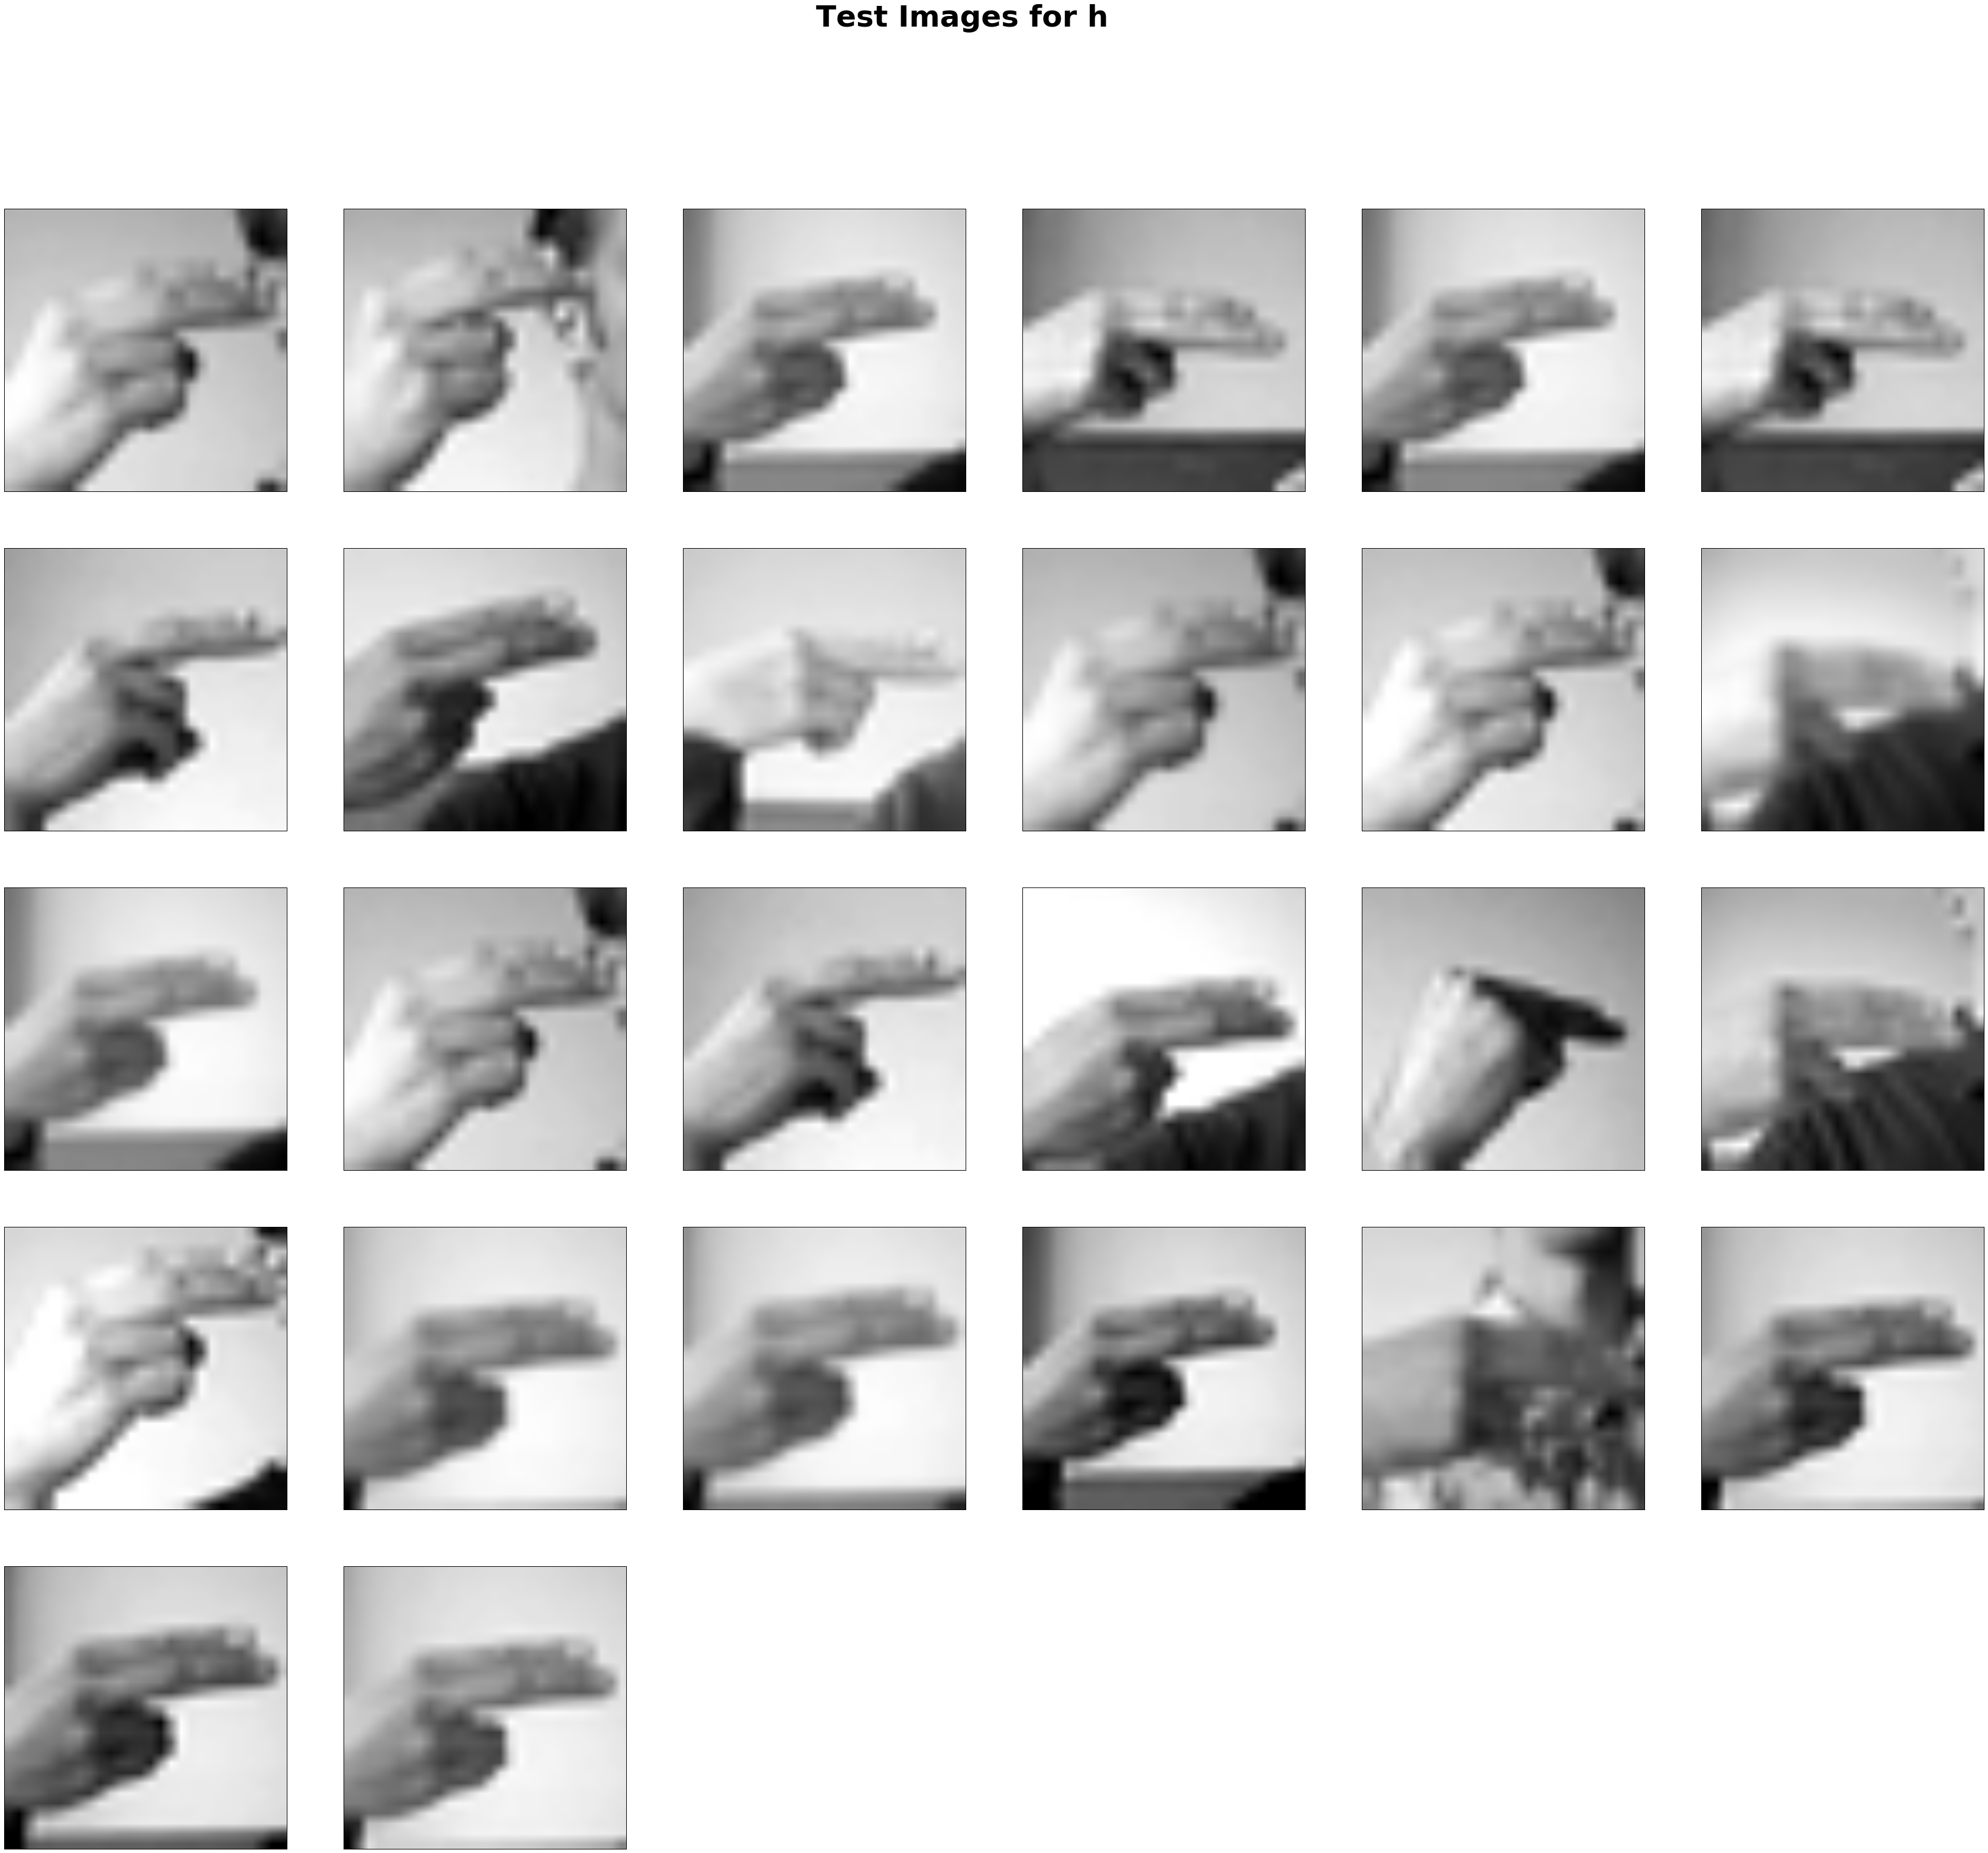

In [ ]:
fig1 = None
fig2 = None

while 1:
    
    alphabet = input("Enter the desired alphabet: ")
    alphabet = alphabet.lower()
        
    if alphabet == 'j' or alphabet == 'z':
        print('\n Sorry! This alphabet is not in Sign Language datset.\n')
        continue
    
    #### !!!!: clearing doesn't work in notebook !!!!!
    if fig1 != None or fig2!=None:
        clear_output()

  
    if alphabet == '-1':
        break
    

    fig1 = draw_imgs(alphabet, 'train')
    fig2 = draw_imgs(alphabet, 'test')
    
    plt.show()
    
    ex = input("Stop Visualizing? (y or n): ")
    if ex =='y':
        clear_output()
        break

In [ ]:
m 